In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pylab as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
data = pd.read_csv("/content/drive/MyDrive/tesla.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [8]:
def check_df(data, head=5):
 print("------------- Shape -------------")
 print(data.shape)
 print("------------- Types -------------")
 print(data.dtypes)
 print("------------- Head -------------")
 print(data.head(head))
 print("------------- Tail -------------")
 print(data.tail(head))
 print("------------- Na -------------")
 print(data.isnull().sum())
 print("------------- Quantiles -------------")

In [9]:
# Sadece sayısal sütunları seç
numeric_df = data.select_dtypes(include=['number'])
print(numeric_df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

                    0.00           0.05          0.50          0.95  \
Open           16.139999      23.384999  2.130350e+02  3.519100e+02   
High           16.629999      24.022501  2.167450e+02  3.567500e+02   
Low            14.980000      22.867499  2.088700e+02  3.460250e+02   
Close          15.800000      23.565000  2.129600e+02  3.511675e+02   
Adj Close      15.800000      23.565000  2.129600e+02  3.511675e+02   
Volume     118500.000000  633825.000000  4.578400e+06  1.476090e+07   

                   0.99          1.00  
Open       4.235790e+02  6.736900e+02  
High       4.284705e+02  7.861400e+02  
Low        4.122865e+02  6.735200e+02  
Close      4.243455e+02  7.800000e+02  
Adj Close  4.243455e+02  7.800000e+02  
Volume     2.459959e+07  4.706500e+07  


In [10]:
check_df(data)

------------- Shape -------------
(2416, 7)
------------- Types -------------
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
------------- Head -------------
         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900
------------- Tail -------------
            Date        Open        High         Low       Close   Adj Close  \
2411  2020-01-28  568.489990  576.809998  558.080017  566.900024  566.900024   
2412  2020-01-29  575.690002  589.799988  567.429993  580.989990  580.989990   
2413 

In [11]:
data["Date"] = pd.to_datetime(data["Date"])

In [12]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [13]:
tesla_df = data[["Date", "Close"]]

In [14]:
tesla_df.head()

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [15]:
print("minumum tarih: ", tesla_df["Date"].min())
print("maksimum tarih: ", tesla_df["Date"].max())

minumum tarih:  2010-06-29 00:00:00
maksimum tarih:  2020-02-03 00:00:00


In [16]:
tesla_df.index = tesla_df["Date"]

In [17]:
tesla_df.head()

,Date,Close
Date,,
2010-06-29,2010-06-29,23.889999
2010-06-30,2010-06-30,23.830000
2010-07-01,2010-07-01,21.959999
2010-07-02,2010-07-02,19.200001
2010-07-06,2010-07-06,16.110001


In [19]:
tesla_df.drop("Date", axis=1, inplace=True)

<ipython-input-19-7f24486b265b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_df.drop("Date", axis=1, inplace=True)


In [20]:
tesla_df

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2020-01-28,566.900024
2020-01-29,580.989990
2020-01-30,640.809998


In [21]:
result_df = tesla_df.copy()

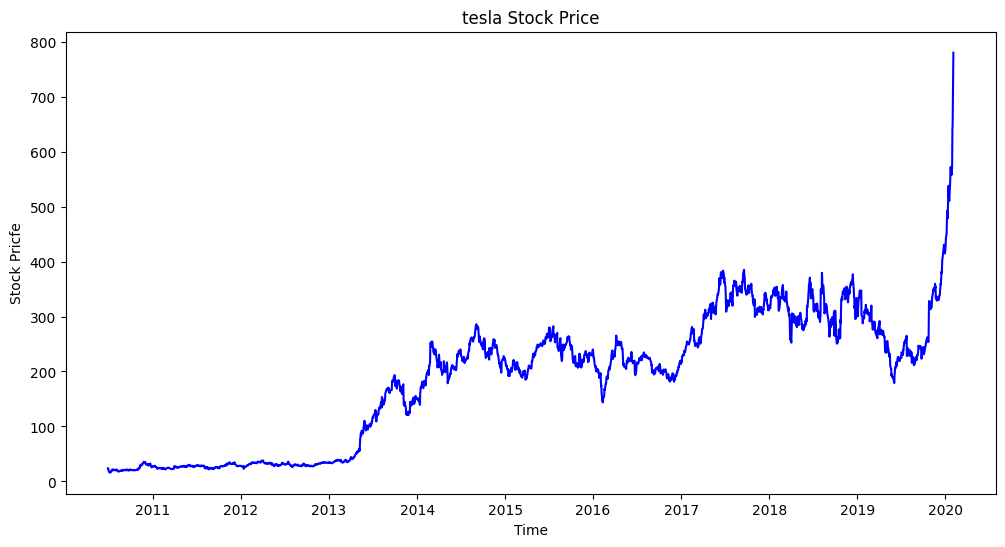

In [22]:
plt.figure(figsize=(12,6))
plt.plot(tesla_df['Close'], color='blue')
plt.ylabel('Stock Pricfe')
plt.title('tesla Stock Price')
plt.xlabel('Time')
plt.show()


In [23]:
tesla_df = tesla_df.values

In [24]:
tesla_df[0:5]

array([[23.889999],
       [23.83    ],
       [21.959999],
       [19.200001],
       [16.110001]])

In [25]:
tesla_df = tesla_df.astype('float32')

In [28]:
def split_data(dataframe, test_size):
    pos = int(round(len(dataframe) * (1-test_size)))
    train = dataframe[:pos]
    test = dataframe[pos:]
    return train,test, pos

In [29]:
train,test, pos = split_data(tesla_df, 0.20)       # Verinin returnleri yazıyorum üç tane ve yüzde 20 bir ayırma işlemi yapıyorum.
print(train.shape, test.shape)

(1933, 1) (483, 1)


In [30]:
scaler_train = MinMaxScaler(feature_range = (0,1))
train = scaler_train.fit_transform(train)
# Bu işlemi şimid test veri seti için gerçekleştiriyorum.

scaler_test = MinMaxScaler(feature_range = (0,1))
test = scaler_test.fit_transform(test)
train[0:5]

array([[0.02191224],
       [0.02174973],
       [0.01668472],
       [0.0092091 ],
       [0.00083966]], dtype=float32)

In [31]:
test[0:5]

array([[0.25685903],
       [0.24829045],
       [0.25511202],
       [0.24978784],
       [0.2465767 ]], dtype=float32)

In [32]:
def create_features(data, lookback):
    X, Y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i,0])
        Y.append(data[i,0])

    return np.array(X), np.array(Y)

In [33]:
lookback = 20

In [34]:
X_train, y_train = create_features(train, lookback)

X_test, y_test = create_features(test, lookback)

In [35]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1913, 20) (1913,) (463, 20) (463,)


In [36]:
print(X_train[0:5])
print(y_train[0:5])

[[0.02191224 0.02174973 0.01668472 0.0092091  0.00083966 0.
  0.00449621 0.00433369 0.0033857  0.00633803 0.01094258 0.011078
  0.01310942 0.0165493  0.01218851 0.01197183 0.01408451 0.01486999
  0.01394908 0.01286566]
 [0.02174973 0.01668472 0.0092091  0.00083966 0.         0.00449621
  0.00433369 0.0033857  0.00633803 0.01094258 0.011078   0.01310942
  0.0165493  0.01218851 0.01197183 0.01408451 0.01486999 0.01394908
  0.01286566 0.01332611]
 [0.01668472 0.0092091  0.00083966 0.         0.00449621 0.00433369
  0.0033857  0.00633803 0.01094258 0.011078   0.01310942 0.0165493
  0.01218851 0.01197183 0.01408451 0.01486999 0.01394908 0.01286566
  0.01332611 0.01232395]
 [0.0092091  0.00083966 0.         0.00449621 0.00433369 0.0033857
  0.00633803 0.01094258 0.011078   0.01310942 0.0165493  0.01218851
  0.01197183 0.01408451 0.01486999 0.01394908 0.01286566 0.01332611
  0.01232395 0.01121344]
 [0.00083966 0.         0.00449621 0.00433369 0.0033857  0.00633803
  0.01094258 0.011078   0.01

In [37]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1913, 1, 20) (1913, 1) (463, 1, 20) (463, 1)


In [42]:
model = Sequential()

In [43]:
model.add(LSTM(units=50,
 activation='relu',
 input_shape=(X_train.shape[1], lookback)))

In [44]:
model.add(Dropout(0.2))
model.add(Dense(1))

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                14200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 14251 (55.67 KB)
Trainable params: 14251 (55.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [48]:
callbacks = [EarlyStopping(monitor='val_loss', patience=3, verbose=2, mode='min'),
 ModelCheckpoint(filepath='model2.h5', monitor='val_loss', mode='min',
 save_best_only=True, save_weights_only=False, verbose=2)]

In [49]:
history = model.fit(x=X_train,
 y=y_train,
 epochs=100,
 batch_size=20,
 validation_data=(X_test, y_test),
 callbacks=callbacks,
 shuffle=False)

Epoch 1/100
90/96 [===========================>..] - ETA: 0s - loss: 0.0087
Epoch 1: val_loss improved from inf to 0.00457, saving model to model2.h5
96/96 [==============================] - 3s 12ms/step - loss: 0.0092 - val_loss: 0.0046
Epoch 2/100
69/96 [====================>.........] - ETA: 0s - loss: 0.0058

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


92/96 [===========================>..] - ETA: 0s - loss: 0.0068
Epoch 2: val_loss improved from 0.00457 to 0.00372, saving model to model2.h5
96/96 [==============================] - 0s 3ms/step - loss: 0.0070 - val_loss: 0.0037
Epoch 3/100
92/96 [===========================>..] - ETA: 0s - loss: 0.0052
Epoch 3: val_loss improved from 0.00372 to 0.00319, saving model to model2.h5
96/96 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 4/100
95/96 [============================>.] - ETA: 0s - loss: 0.0047
Epoch 4: val_loss improved from 0.00319 to 0.00290, saving model to model2.h5
96/96 [==============================] - 0s 4ms/step - loss: 0.0049 - val_loss: 0.0029
Epoch 5/100
89/96 [==========================>...] - ETA: 0s - loss: 0.0043
Epoch 5: val_loss did not improve from 0.00290
96/96 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0030
Epoch 6/100
89/96 [==========================>...] - ETA: 0s - loss: 0.0040
Epo

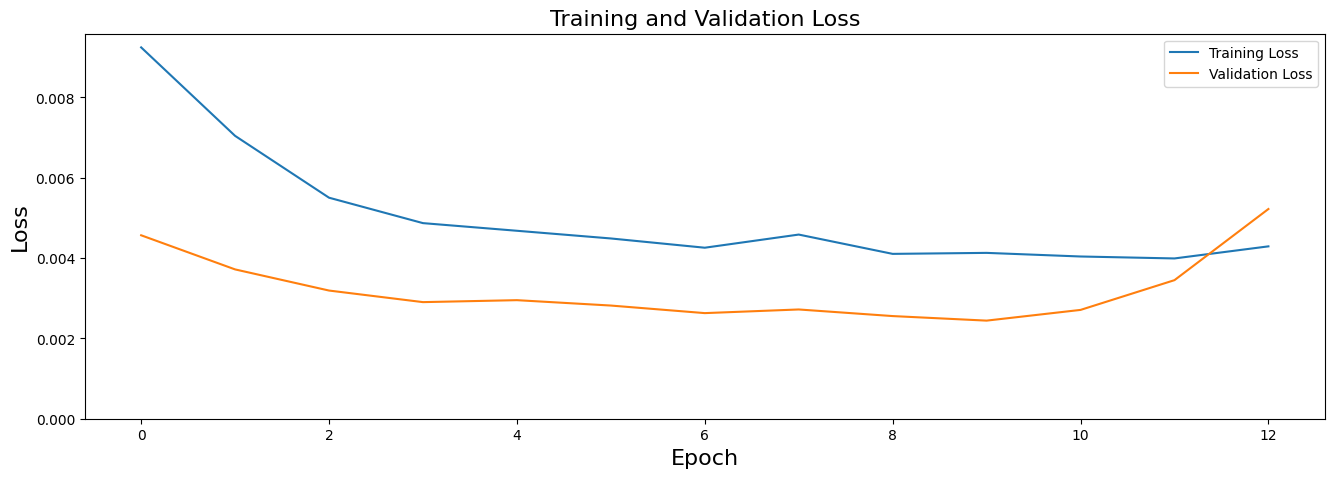

In [50]:
plt.figure(figsize=(16, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title('Training and Validation Loss', fontsize=16)
plt.show()


In [51]:
loss = model.evaluate(X_test, y_test, batch_size=20)
print("\nTest Loss : %1f%%" % (100.0 * loss))

24/24 [==============================] - 0s 3ms/step - loss: 0.0052

Test Loss : 0.522193%


In [52]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


15/15 [==============================] - 0s 2ms/step


In [53]:
train_predict = scaler_train.inverse_transform(train_predict)
test_predict = scaler_test.inverse_transform(test_predict)

In [54]:
y_train = scaler_train.inverse_transform(y_train)
y_test = scaler_test.inverse_transform(y_test)


In [55]:
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))

In [56]:
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))

In [57]:
print(f"TRAİN RMSE : {train_rmse}")
print(f"TEST RMSE : {test_rmse}")

TRAİN RMSE : 19.214670181274414
TEST RMSE : 43.432167053222656


In [58]:
train_predict_df = result_df[lookback:pos]
train_predict_df["Predicted"] = train_predict
train_predict_df.head()


<ipython-input-58-4486c2626c77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_predict_df["Predicted"] = train_predict


,Close,Predicted
Date,,
2010-07-28,20.719999,35.445072
2010-07-29,20.350000,35.352280
2010-07-30,19.940001,35.397369
2010-08-02,20.920000,35.260509
2010-08-03,21.950001,35.213951


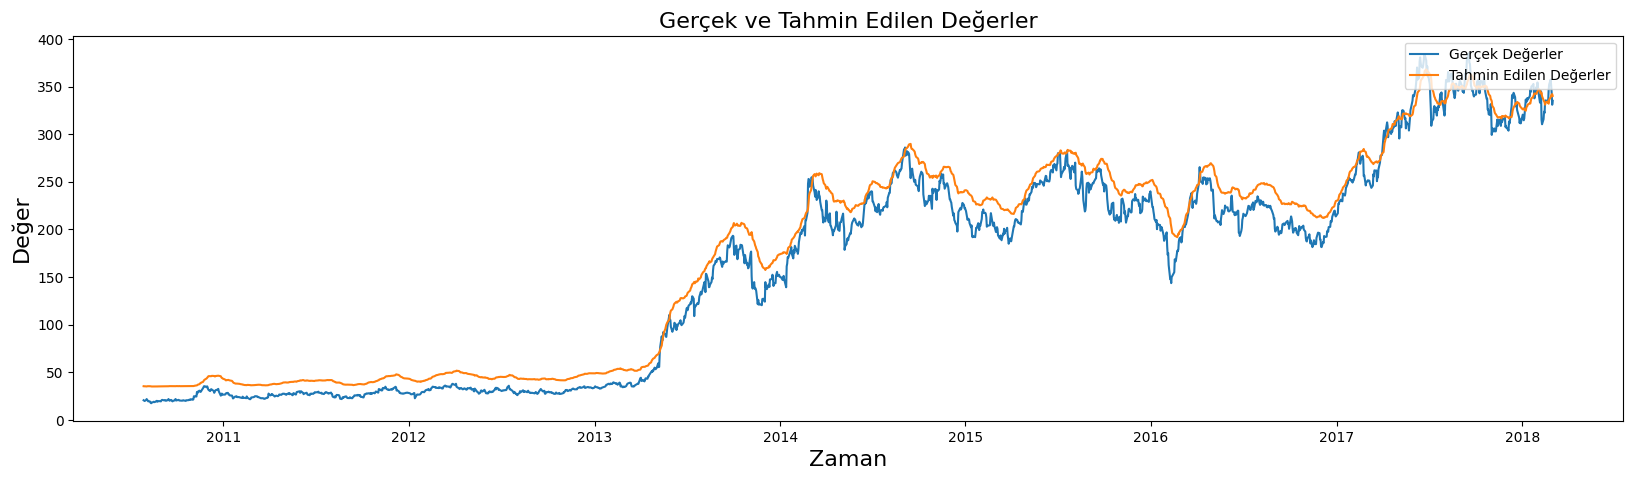

In [59]:
train_predict_df = result_df.iloc[lookback:pos].copy()
train_predict_df["Predicted"] = train_predict
plt.figure(figsize=(20, 5))
plt.plot(train_predict_df.index, train_predict_df["Close"], label='Gerçek Değerler')
plt.plot(train_predict_df.index, train_predict_df["Predicted"], label='Tahmin Edilen Değerler')
plt.legend(loc='upper right')
plt.xlabel('Zaman', fontsize=16)
plt.ylabel('Değer', fontsize=16)
plt.title('Gerçek ve Tahmin Edilen Değerler', fontsize=16)
plt.show()
